# Neural Network for logical XOR Function

In this lesson you will build a small neural network in Keras and train it to replicate the logical XOR function.

## Imports

In [22]:
%tensorflow_version 2.8.0
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot

from numpy.random import seed

from IPython.display import SVG

seed(123)
tf.keras.utils.set_random_seed(
    123
)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Create dataset for the logical XOR function

In [23]:
data_X = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]])
data_y = np.array([0, 
                   1, 
                   1, 
                   0])

In [24]:
data_X.shape

(4, 2)

## Build the neural net model

In [25]:
# TODO build model with one dense layer
model = Sequential()
model.add(Dense(10, input_shape= [2, ], activation='sigmoid')) # 2 units, each data has 2 elements

In [26]:
model.summary()
# param = 2 feartures per row * 2 nerons + 2 bias

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


# Question 1: 
How many parameters are there in the model so far? Why? Explain in detail what each parameter represents. Answer in the cell below. 

6 parameters. There are 2 input nodes, connected to 2 hidden nodes. This gives 2x2 = 4 weights. This accounts for 4 of the parameters.

The other 2 parameters are the bias terms: one bias weight for each of the two hidden nodes.

## Add another layer

In [27]:
# TODO Add another dense layer to the model
model.add(Dense(1, activation='sigmoid')) # make output to be (1, )

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Question 2: 
How many new parameters are there now (e.g., how many were added after question 1)? Why? What does each new parameter represent? 

There are 3 new parameters (for a total of 9). The new layer contains a single node, so each of the 2 previous hidden-layer nodes are connected to this single new node. That gives 2 regular weights. In addition, the new single node has a single bias node, connected to it with 1 weight. Hence there are 3 new weights in the network.

## Visualize the model

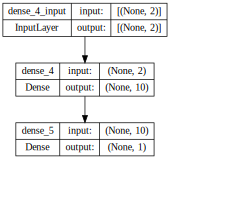

In [29]:
SVG(model_to_dot(model, show_shapes=True, dpi=100).create(prog='dot', format='svg'))

## Build the model

In [30]:
# compile the model using adam as the optmizer and binary_crossentropy as the loss. 
# checkout compile API: https://keras.io/models/sequential/#compile

# TODO
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

### Modify the steps per epoch, number of epochs, etc, and train the model. The goal should be closed to 100% accuracy for the XOR data.

In [31]:
# fit the model using 500 steps per epoch and 10 epochs
# checkout fit API: https://keras.io/models/sequential/#fit

# TODO
train_dataset = tf.data.Dataset.from_tensor_slices((data_X, data_y)).repeat().batch(4)
train_dataset.as_numpy_iterator().next()

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([0, 1, 1, 0]))

In [32]:
model.fit(train_dataset, steps_per_epoch=500, epochs=20) 

Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.6300
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5881 - accuracy: 0.9550
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1712 - accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0442 - accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 1.0000

# Run prediction using trained model.

In [37]:
# make predictions on the data fed into the model.
# checkout predict API: https://keras.io/models/sequential/#predict

# TODO
model.predict(data_X)

1/1 [==============================] - 0s 497ms/step


array([[4.6193114e-04],
       [9.9974096e-01],
       [9.9949813e-01],
       [2.2683089e-04]], dtype=float32)

# Question 3:
Explain the results of the predict() call above. How well did the trained model do on this problem?

The model is close to the desire results given in data_y (see following cell). The results are not exact because we have a sigmoid activation and will never output exactly 1 or 0. But if we consider a threshold of 0.5, setting the output to 1 if above threshold and 0 otherwise, then indeed the output is exactly [0,1,1,0] for the 4 inputs, as expected. Thus the network has solved the XOR problem.

In [34]:
data_y

array([0, 1, 1, 0])

# Question 4:
Print the weights of both layers of the trained network below. HINT: model.layers gives a list of layers. layer.get_weights() returns layer weights.

In [39]:
# print the weights of the first layer 
# TODO
model.layers[0].get_weights()

[array([[ 4.410806 ,  3.793773 ,  3.6604424,  4.4671035, -4.5170693,
          3.8799808,  4.298926 , -4.091093 ,  4.4440475, -4.8780932],
        [ 4.762292 ,  3.0058024,  2.80454  , -4.7771015,  4.723501 ,
          3.0255823,  4.808515 ,  4.20785  , -4.294473 ,  4.919557 ]],
       dtype=float32),
 array([-1.9894719, -5.472498 , -5.2012343,  2.592556 , -2.5460126,
        -5.5040474, -1.979814 ,  2.5900664, -2.7915435,  2.9377851],
       dtype=float32)]

In [40]:
# print the weights of the second layer 
# TODO
model.layers[1].get_weights()

[array([[ 5.520595 ],
        [-5.157381 ],
        [-4.3029914],
        [-4.7487383],
        [ 5.0098104],
        [-3.8407085],
        [ 5.358925 ],
        [-3.7093778],
        [ 4.088078 ],
        [-5.05074  ]], dtype=float32),
 array([3.1315122], dtype=float32)]